In [1]:
import numpy as np
import pandas as pd

dataset = pd.read_csv('hitters.csv')
dataset

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,N,E,325,9,3,700.0,N
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,A,E,313,381,20,875.0,A
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,A,W,37,113,7,385.0,A
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,A,E,1314,131,12,960.0,A


In [2]:
dataset = dataset[['League', 'Division', 'CAtBat', 'CHits', 'CHmRun', 'CRBI', 'Assists', 'PutOuts', 'CWalks', 'Salary']]
dataset

,League,Division,CAtBat,CHits,CHmRun,CRBI,Assists,PutOuts,CWalks,Salary
0,A,E,293,66,1,29,33,446,14,NaN
1,N,W,3449,835,69,414,43,632,375,475.0
2,A,W,1624,457,63,266,82,880,263,480.0
3,N,E,5628,1575,225,838,11,200,354,500.0
4,N,E,396,101,12,46,40,805,33,91.5
...,...,...,...,...,...,...,...,...,...,...
317,N,E,2703,806,32,311,9,325,138,700.0
318,A,E,5511,1511,39,451,381,313,875,875.0
319,A,W,1700,433,7,93,113,37,146,385.0
320,A,E,3198,857,97,420,131,1314,332,960.0


In [3]:
dataset = dataset.dropna()

In [4]:
dataset = dataset.to_numpy()
dataset

array([['N', 'W', 3449, ..., 632, 375, 475.0],
       ['A', 'W', 1624, ..., 880, 263, 480.0],
       ['N', 'E', 5628, ..., 200, 354, 500.0],
       ...,
       ['A', 'W', 1700, ..., 37, 146, 385.0],
       ['A', 'E', 3198, ..., 1314, 332, 960.0],
       ['A', 'W', 4908, ..., 408, 249, 1000.0]], dtype=object)

In [5]:
print(dataset.shape)

(263, 10)


In [6]:
x = dataset[:, :-1]
y = dataset[:, -1]

print(x.shape, y.shape)

(263, 9) (263,)


In [7]:
from sklearn.preprocessing import LabelEncoder
dataset[:, 0] = LabelEncoder().fit_transform(dataset[:, 0])
dataset[:, 1] = LabelEncoder().fit_transform(dataset[:, 1])
dataset

array([[1, 1, 3449, ..., 632, 375, 475.0],
       [0, 1, 1624, ..., 880, 263, 480.0],
       [1, 0, 5628, ..., 200, 354, 500.0],
       ...,
       [0, 1, 1700, ..., 37, 146, 385.0],
       [0, 0, 3198, ..., 1314, 332, 960.0],
       [0, 1, 4908, ..., 408, 249, 1000.0]], dtype=object)

In [8]:
new_dataset = pd.DataFrame(dataset)
new_dataset.iloc[:, 2:].replace(0, np.nan, inplace=True)
new_dataset.dropna(inplace=True)
new_dataset

C:\Users\atila\AppData\Local\Temp\ipykernel_2144\2046125104.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_dataset.iloc[:, 2:].replace(0, np.nan, inplace=True)
C:\Users\atila\AppData\Local\Temp\ipykernel_2144\2046125104.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_dataset.iloc[:,

,0,1,2,3,4,5,6,7,8,9
0,1,1,3449,835,69,414,43,632,375,475.0
1,0,1,1624,457,63,266,82,880,263,480.0
2,1,0,5628,1575,225,838,11,200,354,500.0
3,1,0,396,101,12,46,40,805,33,91.5
4,0,1,4408,1133,19,336,421,282,194,750.0
...,...,...,...,...,...,...,...,...,...,...
258,1,0,2703,806,32,311,9,325,138,700.0
259,0,0,5511,1511,39,451,381,313,875,875.0
260,0,1,1700,433,7,93,113,37,146,385.0
261,0,0,3198,857,97,420,131,1314,332,960.0


In [9]:
dataset = new_dataset.to_numpy()
print(dataset.shape)

(246, 10)


In [10]:
x = dataset[:, :-1]
y = dataset[:, -1]

print(x.shape, y.shape)

(246, 9) (246,)


In [11]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
predictions = lof.fit_predict(x[:, 1:])
outliers = np.where(predictions == -1)[0]
data_new = x[~np.isin(np.arange(len(x)), outliers), :]
y = y[~np.isin(np.arange(len(y)), outliers)]
x = data_new
x

array([[1, 1, 3449, ..., 43, 632, 375],
       [1, 0, 5628, ..., 11, 200, 354],
       [0, 1, 4408, ..., 421, 282, 194],
       ...,
       [0, 0, 5511, ..., 381, 313, 875],
       [0, 1, 1700, ..., 113, 37, 146],
       [0, 1, 4908, ..., 4, 408, 249]], dtype=object)

In [12]:
x.shape

(221, 9)

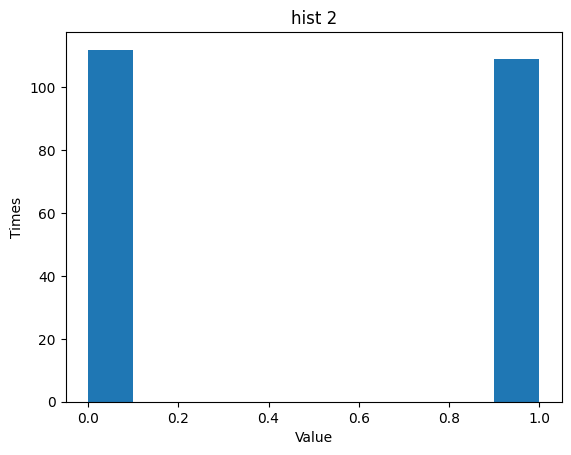

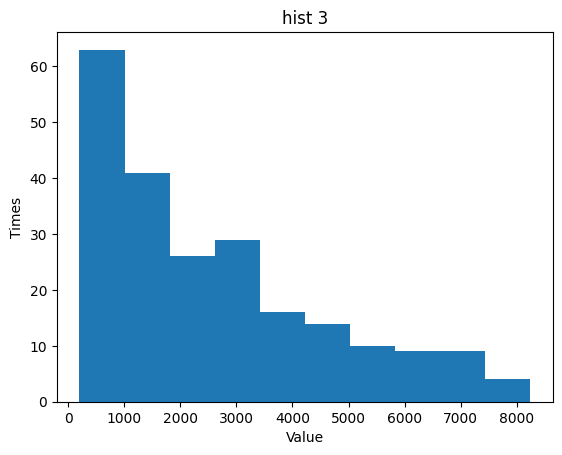

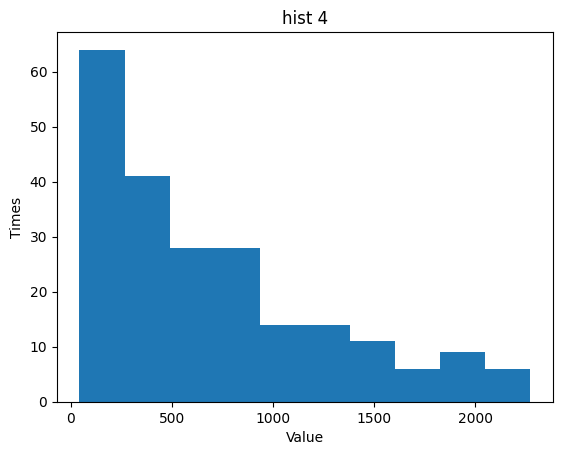

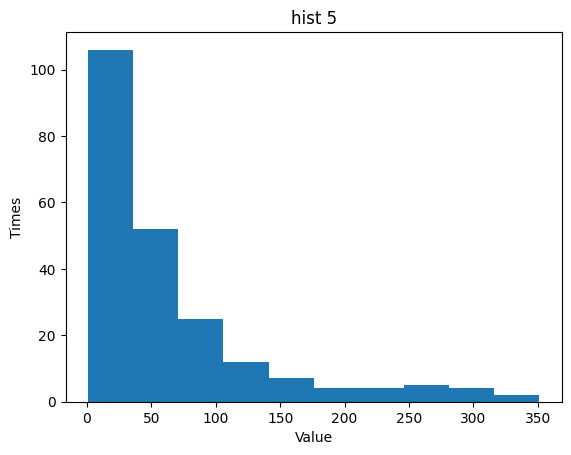

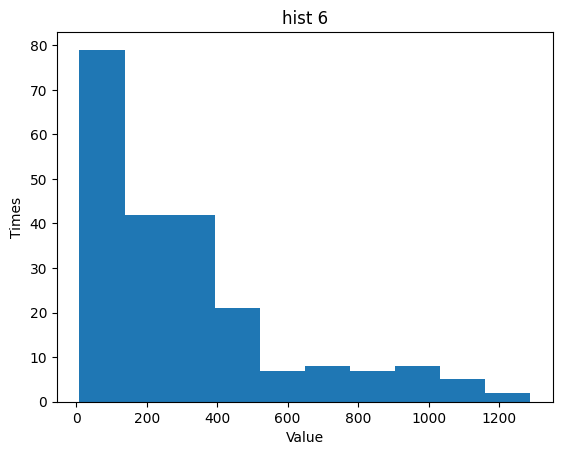

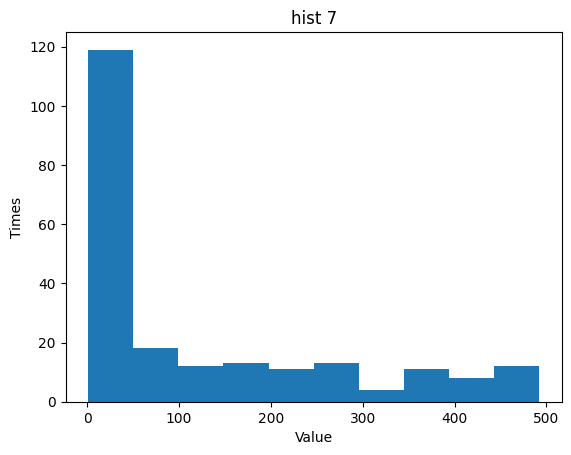

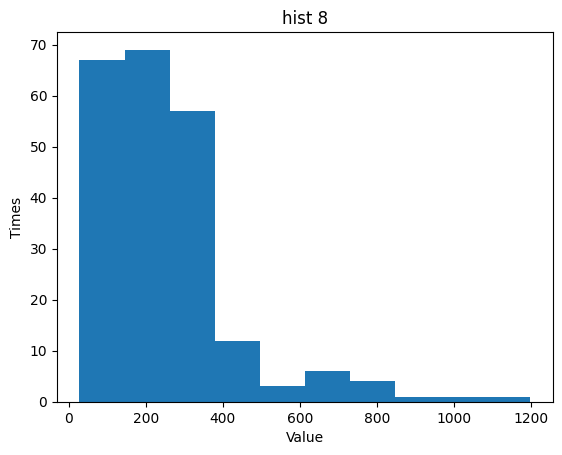

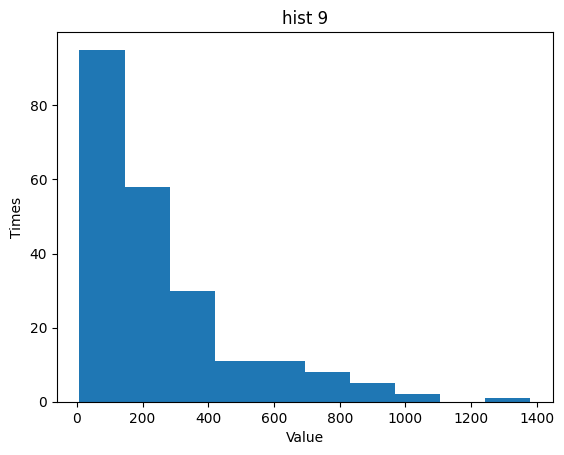

In [13]:
import matplotlib.pyplot as plt

n_cols = x.shape[1]
for i in range(1, n_cols):
    # ستون فعلی را استخراج کنید
    column = x[:, i]

    # رسم هیستوگرام
    plt.hist(column)
    plt.title(f"hist {i + 1}")
    plt.xlabel("Value")
    plt.ylabel("Times")
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)



In [15]:
y_train, y_test = y_train.astype(int), y_test.astype(int)

In [16]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.tree import DecisionTreeRegressor

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = DecisionTreeRegressor(random_state=7)

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        # ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],
    'model__max_depth': [2,4,6,8,10,12,14,16,18,20],
    'model__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'model__criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'model__random_state': [0,4, 7, 11, 15, 36, 47]
}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=30
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)


Best Params: {'model__criterion': 'absolute_error', 'model__max_depth': 2, 'model__min_samples_leaf': 9, 'model__random_state': 0}
 Pipeline(steps=[('power', PowerTransformer()),
                ('model',
                 DecisionTreeRegressor(criterion='absolute_error', max_depth=2,
                                       min_samples_leaf=9, random_state=0))]) 
best Score: 0.3911038867203439


In [17]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.ensemble import RandomForestRegressor

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = RandomForestRegressor(random_state=7)

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        # ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],
    'model__max_depth': [2,4,6,8,10,12,14,16,18,20],
    'model__min_samples_leaf': [1,2,3,4,5,6,7,8,9,10],
    'model__criterion': ['friedman_mse', 'poisson', 'absolute_error', 'squared_error'],
    'model__random_state': [0,4, 7, 11, 15, 36, 47]
}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)

Best Params: {'model__criterion': 'absolute_error', 'model__max_depth': 8, 'model__min_samples_leaf': 1, 'model__random_state': 11}
 Pipeline(steps=[('power', PowerTransformer()),
                ('model',
                 RandomForestRegressor(criterion='absolute_error', max_depth=8,
                                       random_state=11))]) 
best Score: 0.45010687647184344


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LogisticRegression

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = LogisticRegression(random_state=7)

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        # ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],
    # 'model__penalty': ['l1', 'l2'],
    'model__C': [0.001, 0.01, 0.1, 1, 10, 100],
    # 'model__solver': ['liblinear', 'sag'],
    # 'model__max_iter': [100, 1000, 10000],
    # 'model__tol': [0.001, 0.0001, 0.00001]
}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)


C:\Users\atila\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best Params: {'model__C': 0.1}
 Pipeline(steps=[('power', PowerTransformer()),
                ('model', LogisticRegression(C=0.1, random_state=7))]) 
best Score: 0.044444444444444446


In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.linear_model import LinearRegression


standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = LinearRegression()

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],

}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)

Best Params: {}
 Pipeline(steps=[('power', PowerTransformer()), ('robust', RobustScaler()),
                ('model', LinearRegression())]) 
best Score: 0.561707266684857


In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold

from sklearn.svm import SVR

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()
power_transform = PowerTransformer()
robust_scaler = RobustScaler()
model = SVR()

pipline = Pipeline(
    steps=[
        ('power', power_transform),
        ('robust', robust_scaler),
        # ('minmax', min_max_scaler),
        # ('standard', standard_scaler),
        ('model', model)
    ]
)

grid_params = {
    # 'power__method': ['yeo-johnson', 'box-cox'],
    'model__C': [0.1, 1, 10],
    'model__gamma': [0.01, 0.1, 1],
    'model__kernel': ['linear', 'rbf', 'poly'],
}

grid_search = GridSearchCV(
    pipline,
    grid_params,
    cv=5,
    n_jobs=-1
)

grid_search.fit(x_train, y_train)

print(
    f"Best Params: {grid_search.best_params_}\n",
    grid_search.best_estimator_,
    f"\nbest Score: {grid_search.score(x_test, y_test)}"
)

Best Params: {'model__C': 10, 'model__gamma': 0.01, 'model__kernel': 'linear'}
 Pipeline(steps=[('power', PowerTransformer()), ('robust', RobustScaler()),
                ('model', SVR(C=10, gamma=0.01, kernel='linear'))]) 
best Score: 0.47478138364535627
